In [22]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train=pd.read_csv("digit-recognizer/train.csv",dtype=np.float32)

In [5]:
targets_numpy=train.label.values

In [8]:
features_numpy=train.loc[:,train.columns != "label"].values/255

In [9]:
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42) 

In [12]:
featuresTrain=torch.from_numpy(features_train)
targetsTrain=torch.from_numpy(targets_train).type(torch.LongTensor)

In [13]:
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor)

In [16]:
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

In [18]:
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

In [20]:
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

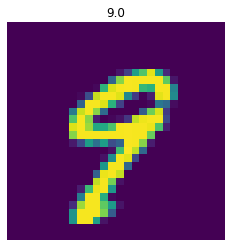

In [26]:
plt.imshow(features_numpy[11].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[11]))
plt.savefig('graph.png')
plt.show()

In [33]:
class LogisticRegressionModel (nn.Module):
    def __init__(self,input_dim,output_dim):
        super(LogisticRegressionModel,self).__init__()
        self.linear=nn.Linear(input_dim,output_dim)
    def forward(self,x):
        out= self.linear(x)
        return out

In [29]:
input_dim=28*28
output_dim=10

In [34]:
model= LogisticRegressionModel(input_dim,output_dim)

error=nn.CrossEntropyLoss()

learning_rate=0.001

optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

In [35]:
count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        # Define variables
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and cross entropy loss
        loss = error(outputs, labels)
        
        # Calculate gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        # Prediction
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader: 
                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 1.8326765298843384  Accuracy: 67.32142639160156%
Iteration: 1000  Loss: 1.608359932899475  Accuracy: 75.6547622680664%
Iteration: 1500  Loss: 1.299942970275879  Accuracy: 78.3452377319336%
Iteration: 2000  Loss: 1.1987583637237549  Accuracy: 80.05952453613281%
Iteration: 2500  Loss: 1.0348283052444458  Accuracy: 81.03571319580078%
Iteration: 3000  Loss: 0.9249476790428162  Accuracy: 81.91666412353516%
Iteration: 3500  Loss: 0.906690239906311  Accuracy: 82.4047622680664%
Iteration: 4000  Loss: 0.7568857669830322  Accuracy: 82.96428680419922%
Iteration: 4500  Loss: 0.9752069115638733  Accuracy: 83.26190185546875%
Iteration: 5000  Loss: 0.8095564246177673  Accuracy: 83.58333587646484%
Iteration: 5500  Loss: 0.7514858245849609  Accuracy: 83.83333587646484%
Iteration: 6000  Loss: 0.8788732886314392  Accuracy: 84.22618865966797%
Iteration: 6500  Loss: 0.6623538732528687  Accuracy: 84.45237731933594%
Iteration: 7000  Loss: 0.715488612651825  Accuracy: 84.75%
Iteration: 7